# Classification

## Supervised learning

### Unsupervised learning: Uses unlabeled data

- Uncovering hidden patterns from unlabeled data
- Example:
    - Grouping customers into distinct categories (Clustering)

### Reinforcement learning

- Software agents interact with an environment
    - Learn how to optimize their behavior
    - Given a system of rewards and punishments 
    - Draws inspiration from behavioral psychology
    
- Applications
    - Economics
    - Genetics
    - Game playing
    
- AlphaGo: First computer to defeat the world champion in Go

### Supervised learning
- Predictor variables/features and a target variable
- Aim: Predict the target variable, given the predictor variables
    - Classification: Target variable consists of categories
    - Regression: Target variable is continuous

### Naming conventions

- Features = predictor variables = independent variables
- Target variable = dependent variable = response variable

### Supervised learning in Python
- We will use scikit-learn/sklearn
    - Integrates well with the SciPy stack
    
- Other libraries
    - TensorFlow
    - keras

## Exploratory data analysis

### The Iris dataset

Features:
- Petal length
- Petal width
- Sepal length
- Sepal width

Target variable: Species:
- Versicolor
- Virginica
- Setosa

### The Iris dataset in scikit-learn

In [2]:
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('ggplot') 
iris = datasets.load_iris() 
type(iris)

sklearn.utils.Bunch

In [3]:
print(iris.keys())

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [4]:
type(iris.data), type(iris.target)

(numpy.ndarray, numpy.ndarray)

In [5]:
iris.data.shape

(150, 4)

In [6]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

### Exploratory data analysis (EDA)

In [8]:
X = iris.data
y = iris.target
df = pd.DataFrame(X, columns=iris.feature_names) 
print(df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


### Visual EDA

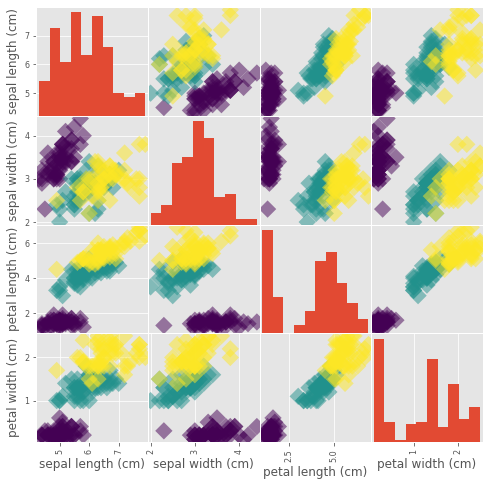

In [9]:
_ = pd.plotting.scatter_matrix(df, c = y, figsize = [8, 8], s=150, marker = 'D')

## The classification challenge

### k-Nearest Neighbors

- Basic idea: Predict the label of a data point by
    - Looking at the ‘k’ closest labeled data points
    - Taking a majority vote

### Scikit-learn fit and predict

- All machine learning models implemented as Python classes
    - They implement the algorithms for learning and predicting
    - Store the information learned from the data
    
- Training a model on the data = ‘ tting’ a model to the data
    - `.fit()` method
    - To predict the labels of new data: `.predict()` method

### Using scikit-learn to fit a classifier

In [11]:
from sklearn.neighbors import KNeighborsClassifier 
knn = KNeighborsClassifier(n_neighbors=6) 
knn.fit(iris['data'], iris['target'])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform')

In [12]:
iris['data'].shape

(150, 4)

In [13]:
iris['target'].shape # targets needs to be a single column with the same # of observation as the feature data

(150,)

### Predicting on unlabeled data`

In [16]:
X_new = np.array(
[
    [5.6, 2.8, 3.9, 1.1],
    [5.7, 3.2, 3.8, 1.3],
    [4.7, 3.2, 1.3, 0.2]
])   # feature in columns and observation in rows
prediction = knn.predict(X_new) 
X_new.shape # 3 obsevation and 4 colums

(3, 4)

In [20]:
print('Prediction: {}'.format(prediction))

Prediction: [1 1 0]


## Measuring model performance


### Measuring model performance

- In classification, accuracy is a commonly used metric
- Accuracy = Fraction of correct predictions
- Which data should be used to compute accuracy?
- How well will the model perform on new data?


- Could compute accuracy on data used to fit classifier
- NOT indicative of ability to generalize
- Split data into **training** and **test** set
- Fit/train the classifier on the training set
- Make predictions on test set
- Compare predictions with the known labels

### Train/test split

In [36]:
from sklearn.model_selection import train_test_split

# use train_test_split function to randomly split data
# firast argument is feature data, the second the targets or labels
# returns the training data, test data, training labels, test labels
# by default split the data into 75% training data and 25% test data, we specify the size using the test_size 
# stratify=y:perform the split so that the split reflects the labels on your data, that is the labels to be distributed in train and test sets as they are in original dataset.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
    random_state=21, stratify=y) 
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print("Test set predictions:")
print(y_pred)

Test set predictions:
[2 1 2 2 1 0 1 0 0 1 0 2 0 2 2 0 0 0 1 0 2 2 2 0 1 1 1 0 0 1 2 2 0 0 1 2 2
 1 1 2 1 1 0 2 1]


In [37]:
# check out accuracy of the model
knn.score(X_test, y_test)

0.9555555555555556

### Model complexity

- Larger k = smoother decision boundary = less complex model
- Smaller k = more complex model = can lead to overfitting

### Exercise: The digits recognition dataset

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])
.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping 

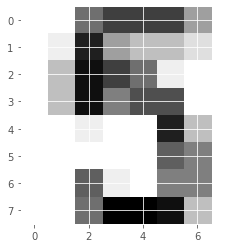

In [38]:
# Import necessary modules
from sklearn import datasets
import matplotlib.pyplot as plt

# Load the digits dataset: digits
digits = datasets.load_digits()

# Print the keys and DESCR of the dataset
print(digits.keys())
print(digits.DESCR)

# Print the shape of the images and data keys
print(digits.images.shape)
print(digits.data.shape)

# Display the 1011th image
plt.imshow(digits.images[1010], cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

Train/Test Split + Fit/Predict/Accuracy

In [39]:
# Import necessary modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# Create feature and target arrays
X = digits.data
y = digits.target

# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42, stratify=y)

# Create a k-NN classifier with 7 neighbors: knn
knn = KNeighborsClassifier(n_neighbors=7)

# Fit the classifier to the training data
knn.fit(X_train, y_train)

# Print the accuracy
print(knn.score(X_test, y_test))

0.9833333333333333


Overfitting and underfitting

In this exercise, you will compute and plot the training and testing accuracy scores for a variety of different neighbor values. By observing how the accuracy scores differ for the training and testing sets with different values of k, you will develop your intuition for overfitting and underfitting.

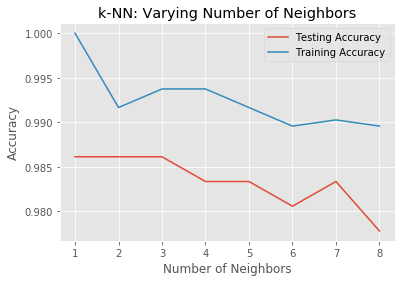

In [40]:
# Setup arrays to store train and test accuracies
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors=k)

    # Fit the classifier to the training data
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test)

# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

# It looks like the test accuracy is highest when using 3 and 5 neighbors. 
# Using 8 neighbors or more seems to result in a simple model that underfits the data. 

# Regression

## Introduction to regression